In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.genmod import families
from patsy import dmatrices
from sklearn.metrics import r2_score

In [76]:
# Load the data into a DataFrame
df = pd.read_csv('/Users/khushbooteotia/Documents/machineLearningTest/cohortedData1.csv')
df.fillna(0, inplace=True)  # Account for NaNs in subset


In [77]:
df['diabetes_types'] = df['diabetes_types'].replace(0, 'none')
df['diabetes_types'] = df['diabetes_types'].replace(1.0, 'one')
df['diabetes_types'] = df['diabetes_types'].replace(2.0, 'two')
categorical_vars = ['diabetes_types']
dummy_vars1 = pd.get_dummies(df[categorical_vars])
df = pd.concat([df, dummy_vars1], axis=1)

df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,ph_min,po2_min,spo2_mean,resp_rate_mean,heart_rate_mean,temperature_mean,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two
0,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,ENGLISH,...,0.00,0.0,95.111111,18.555556,94.260870,36.668571,102.125000,False,False,True
1,15427106,21095677,39134560,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2145-06-22 06:16:00,2145-06-28 19:16:51,6.542257,ASIAN - CHINESE,?,...,7.32,56.0,99.960000,17.846154,97.160000,36.937500,98.040000,True,False,False
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,ENGLISH,...,0.00,0.0,93.526316,23.894737,87.222222,37.256000,110.500000,False,False,True
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,?,...,0.00,0.0,96.600000,15.333333,70.933333,36.855714,96.529412,True,False,False
4,14006414,23638506,36538893,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2187-03-23 11:27:00,2187-04-20 23:25:00,28.498611,WHITE,ENGLISH,...,7.41,98.0,99.346154,20.185185,63.769231,36.821000,93.384615,True,False,False


In [78]:
categorical_vars2 = ['gender']
dummy_vars = pd.get_dummies(df[categorical_vars2])
sex_df = pd.concat([df, dummy_vars], axis=1)

sex_df.fillna(0, inplace=True)

sex_df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,spo2_mean,resp_rate_mean,heart_rate_mean,temperature_mean,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two,gender_F,gender_M
0,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,ENGLISH,...,95.111111,18.555556,94.260870,36.668571,102.125000,False,False,True,False,True
1,15427106,21095677,39134560,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2145-06-22 06:16:00,2145-06-28 19:16:51,6.542257,ASIAN - CHINESE,?,...,99.960000,17.846154,97.160000,36.937500,98.040000,True,False,False,True,False
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,ENGLISH,...,93.526316,23.894737,87.222222,37.256000,110.500000,False,False,True,False,True
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,?,...,96.600000,15.333333,70.933333,36.855714,96.529412,True,False,False,False,True
4,14006414,23638506,36538893,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2187-03-23 11:27:00,2187-04-20 23:25:00,28.498611,WHITE,ENGLISH,...,99.346154,20.185185,63.769231,36.821000,93.384615,True,False,False,True,False


In [79]:
# Assuming your DataFrame is named 'df'
sex_df['language'] = sex_df['language'].replace({"?": 1, "ENGLISH": 0})
sex_df.head()


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,spo2_mean,resp_rate_mean,heart_rate_mean,temperature_mean,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two,gender_F,gender_M
0,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,0,...,95.111111,18.555556,94.260870,36.668571,102.125000,False,False,True,False,True
1,15427106,21095677,39134560,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2145-06-22 06:16:00,2145-06-28 19:16:51,6.542257,ASIAN - CHINESE,1,...,99.960000,17.846154,97.160000,36.937500,98.040000,True,False,False,True,False
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,0,...,93.526316,23.894737,87.222222,37.256000,110.500000,False,False,True,False,True
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,1,...,96.600000,15.333333,70.933333,36.855714,96.529412,True,False,False,False,True
4,14006414,23638506,36538893,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2187-03-23 11:27:00,2187-04-20 23:25:00,28.498611,WHITE,0,...,99.346154,20.185185,63.769231,36.821000,93.384615,True,False,False,True,False


In [80]:

categorical_vars1 = ['race_group']
dummy_vars = pd.get_dummies(sex_df[categorical_vars1])
race_df = pd.concat([sex_df, dummy_vars], axis=1)

race_df.fillna(0, inplace=True)

race_df.head()


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,race,language,...,mbp_mean,diabetes_types_none,diabetes_types_one,diabetes_types_two,gender_F,gender_M,race_group_Asian,race_group_Black,race_group_Hispanic,race_group_White
0,19611589,27643931,32371355,Neuro Stepdown,Neuro Stepdown,2174-11-19 22:27:00,2174-11-22 19:32:18,2.878681,WHITE,0,...,102.125000,False,False,True,False,True,False,False,False,True
1,15427106,21095677,39134560,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2145-06-22 06:16:00,2145-06-28 19:16:51,6.542257,ASIAN - CHINESE,1,...,98.040000,True,False,False,True,False,True,False,False,False
2,19147123,27351170,34740339,Neuro Stepdown,Neuro Stepdown,2171-11-16 11:28:51,2171-11-22 15:44:44,6.177697,BLACK/AFRICAN AMERICAN,0,...,110.500000,False,False,True,False,True,False,True,False,False
3,15617454,24021087,35826606,Neuro Stepdown,Neuro Stepdown,2168-05-31 10:12:13,2168-06-12 17:49:01,12.317222,ASIAN - CHINESE,1,...,96.529412,True,False,False,False,True,True,False,False,False
4,14006414,23638506,36538893,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2187-03-23 11:27:00,2187-04-20 23:25:00,28.498611,WHITE,0,...,93.384615,True,False,False,True,False,False,False,False,True


Training data set length=19941
Testing data set length=4986


/Users/khushbooteotia/Documents/machineLearningTest/.venv/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1359: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 2.679829
         Iterations: 35
         Function evaluations: 47
         Gradient evaluations: 47


/Users/khushbooteotia/Documents/machineLearningTest/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:        totalgluc_perLOS   No. Observations:                19941
Model:             ZeroInflatedPoisson   Df Residuals:                    19911
Method:                            MLE   Df Model:                           29
Date:                 Wed, 19 Jul 2023   Pseudo R-squ.:                  0.1798
Time:                         16:20:59   Log-Likelihood:                -53438.
converged:                       False   LL-Null:                       -65154.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
inflate_Intercept                            0.0904     19.442      0.005      0.996     -38.015      38.196
inflate_hadInsulinDayOne[T.True] 

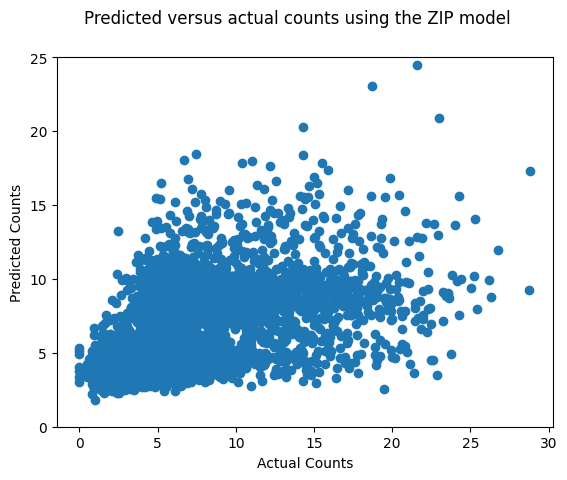

In [99]:
split_index = int(len(race_df) * 0.8)  # 80% for training, 20% for testing

race_df_train = race_df[:split_index]
race_df_test = race_df[split_index:]
print('Training data set length=' + str(len(race_df_train)))
print('Testing data set length=' + str(len(race_df_test)))

expr = 'totalgluc_perLOS ~ resp_rate_mean + po2_min + ph_min + copd_present + hadInsulinDayOne + language + cad_present + heart_failure_present + hypertension_present + gender_F + admElective + anchor_year_group + biliary + pneumonia + uti + connective_disease + ckd_stages + asthma_present + age + SOFA + charlson_comorbidity_index + diabetes_types_one + diabetes_types_two + race_group_Asian + race_group_Black + race_group_Hispanic + skin + hadMeasurmentDayOne'

y_train, X_train = dmatrices(expr, race_df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, race_df_test, return_type='dataframe')
zip_training_results = sm.ZeroInflatedPoisson(
endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit'
).fit()

print(zip_training_results.summary())

# Extract coefficient names and values
coef_names = zip_training_results.params.index
coef_values = zip_training_results.params.values

# Calculate exponentiated coefficients
coef_exp = np.exp(coef_values)
print(coef_exp)

zip_predictions = zip_training_results.predict(X_test, exog_infl=X_test)
predicted_counts = zip_predictions
actual_counts = y_test['totalgluc_perLOS']
print('ZIP RMSE=' + str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts, actual_counts), 2)))))

# Calculate R-squared
r2 = r2_score(actual_counts, predicted_counts)
print("R-squared:", r2)

#Creating and plot the graph
fig = plt.figure()
fig.suptitle('Predicted versus actual counts using the ZIP model')
plt.scatter(actual_counts, predicted_counts)
plt.xlabel('Actual Counts')
plt.ylabel('Predicted Counts')
plt.ylim(0,25)
#plt.xlim(0,25)
plt.show()

#add english proficiency --> 1 for ?, 0 for english; add sex
#sex_female check NEED
#anchor_year_group check NEED
#adm_elective Check --> NEED
#major_surgery 
#is_full_code_admission
#is_full_code_discharge
#esp_rate_mean check
#mbp_mean check check
#heart_rate_mean check
#temperature_mean check
#spo2_mean check
#po2_min check
#pco2_max
#ph_min check
#lactate_max check
#hypertension_present check --> not much
#heart_failure_present check --> not much
#copd_present check
#asthma_present check --> 
#cad_present check --> not much
#ckd_stages check 
#diabetes_types check
#connective_disease check 
#pneumonia check
#uti check
#biliary check 



